## LA STATISTIQUE INFERENTIELLE

## Population et echantillon

In [137]:
import pandas as pd
import numpy as np

# ?pd.pivot_table

In [106]:
# Population entiere

data = pd.DataFrame()
data['poids'] = [47, 59, 45, 62, 22, 80, 78, 19, 88, 90]
data

,poids
0,47
1,59
2,45
3,62
4,22
5,80
6,78
7,19
8,88
9,90


In [107]:
# prelever un Echantillon avec remise de Taille 5
  # Echantillon avec remise c'est le faite de prelever et deposer l'element prelever pour prendre un nouvel element a 
    # chaque fois

sample_with_remplacement = data['poids'].sample(n = 5, replace = True, random_state = 120)
sample_with_remplacement

# la methode sample() de pandas des echatillonements
# l'argement random_state permet d'avoir la meme remise a chaque foi que l'on relance le code.

7    19
0    47
8    88
4    22
1    59
Name: poids, dtype: int64

In [108]:
#  Echantillonnement sans remise de Taille 5

sample_without_remplacement = data['poids'].sample(n = 5, replace = False, random_state = 120)
sample_without_remplacement

5    80
3    62
1    59
4    22
8    88
Name: poids, dtype: int64

In [109]:
# Les parametres statistique de la population entiere

data.describe()

,poids
count,10.000000
mean,59.000000
std,25.651511
min,19.000000
25%,45.500000
50%,60.500000
75%,79.500000
max,90.000000


In [110]:
# Les parametres statistique de l'echatillon avec remise

sample_with_remplacement.describe()

count     5.000000
mean     47.000000
std      28.434134
min      19.000000
25%      22.000000
50%      47.000000
75%      59.000000
max      88.000000
Name: poids, dtype: float64

In [111]:
# Les parametres statistique de l'echatillon sans remise

sample_without_remplacement.describe()

count     5.000000
mean     62.200000
std      25.538207
min      22.000000
25%      59.000000
50%      62.000000
75%      80.000000
max      88.000000
Name: poids, dtype: float64

## FONCTION DE REPARTITION D'UNE VARIABLE

In [112]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')  # le style ggplot est un paquege de R pour affiné les graphique

In [114]:
# Chargement de l'ensemble des données iris

iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [115]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [116]:
iris_df = iris_df.rename(columns={'sepal_length':'longueur_sepales',
                                  'sepal_width':'largeur_sepales',
                                  'petal_length':'longueur_petales',
                                  'petal_width':'largeur_petales', 'species':'especes'})

In [117]:
iris_df

,longueur_sepales,largeur_sepales,longueur_petales,largeur_petales,especes
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [118]:
# les differents especes d'iris

iris_df['especes'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: especes, dtype: int64

## Fonction de repartition empirique (FRE)

la fonction de repartition empirique attrubue la probabilité de 1/n a chacun des n observations dans un echantion. avec n le nombre d'echantillon.
tracons la fonction de repartition emirique de la longueur des petales d'Iris versicolor.

In [119]:
# Longueur des petales d'Iris versicolor

x = np.sort(iris_df[iris_df['especes'] == 'versicolor']['longueur_petales'])
x

# la methode sort() de numpy pour ordonné de facon croissante les valeurs

array([3. , 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. ,
       4. , 4. , 4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4,
       4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
       4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.9, 4.9, 5. , 5.1])

In [120]:
# je vais appliquer la probalité 1/n a chacun des n observations

y = np.arange(1, len(x) + 1) / len(x)
y

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

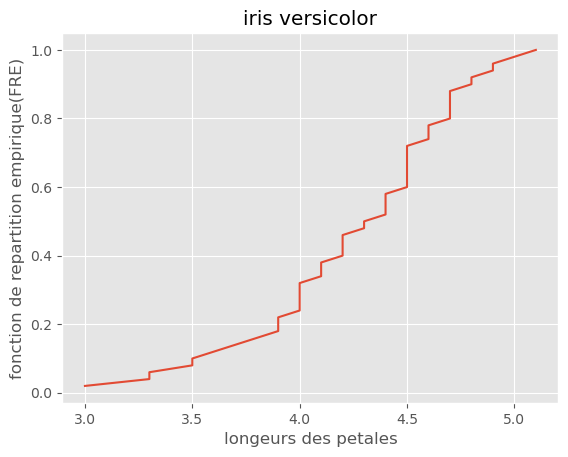

In [121]:
# Tracon maintenent la fonction de repartition empirique(FRE)

plt.plot(x,y)
plt.xlabel('longeurs des petales')
plt.ylabel('fonction de repartition empirique(FRE)')
plt.title('iris versicolor')

plt.show()

nous pouvons observer que 60% des iris versicolor ont une longueur des petales inferieurs ou egale à 4.5cm

In [122]:
# Fonction de calcul de la repartion empirique d'une variable. # Fre = fonction de repartition empirique
def fre(data):           
    
    # Axes des abscisses
    x = np.sort(data)
    
    # Axes des ordonnées
    y = np.arange(1, len(x) + 1) / len(x)
    
    return x, y

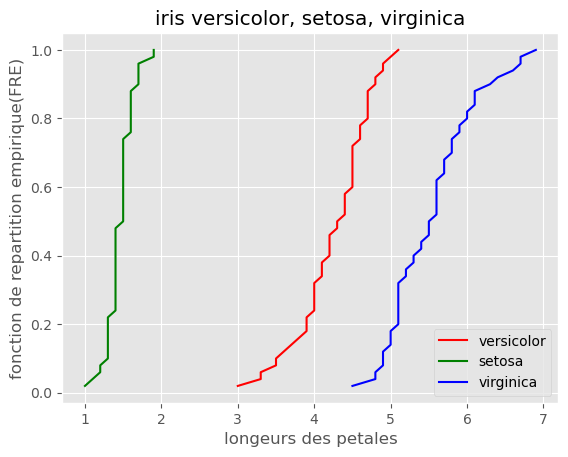

In [136]:
# Longueurs des petales de chaque especes d'Iris
      # nous avons utiliser notre Fre precedente puis on a rajouté nos condition

x_vsericolor, y_versicolor = fre(iris_df[iris_df['especes']=='versicolor']['longueur_petales'])
x_setosa, y_setosa = fre(iris_df[iris_df['especes']=='setosa']['longueur_petales'])
x_virginica, y_virginica = fre(iris_df[iris_df['especes']=='virginica']['longueur_petales'])

plt.plot(x_vsericolor, y_versicolor, color='red')
plt.plot(x_setosa, y_setosa, color='green')
plt.plot(x_virginica, y_virginica, color='blue')
plt.legend(('versicolor', 'setosa', 'virginica')) # le plt.legend() prend un seul element dans un tuple.
plt.xlabel('longeurs des petales')                    # donc il faut doublé le tuple
plt.ylabel('fonction de repartition empirique(FRE)')
plt.title('iris versicolor, setosa, virginica')

plt.show()

le graphique nous montre q'il y a de net difference entre les especes en terme de longueur des petales. Setosa en vert est beaucoup plus court avec une faible variabilité de la longueur des petales. tandisque virginica et versiclor sont beaucoups plus longues

## FONCTION DE DENSITE DE PROBABILITE

La fonction de densité de probabilité d'une variable continue decrit les chances d'observer une valeurs de cette variable.
Nous avons vu comment tracer une densité de probabilité dans la session consacrée a l'analyse univarié

In [124]:
iris_df.head()

,longueur_sepales,largeur_sepales,longueur_petales,largeur_petales,especes
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<function matplotlib.pyplot.show(close=None, block=None)>

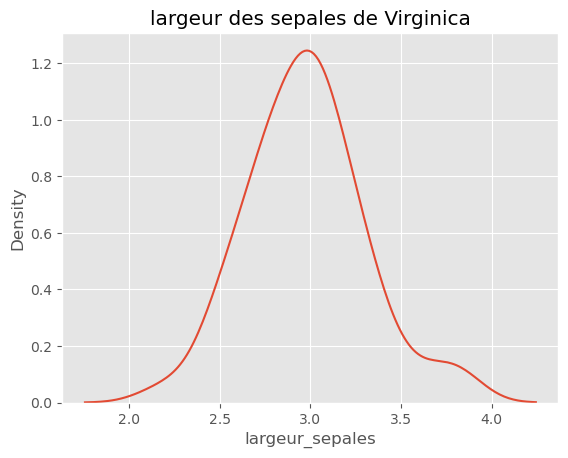

In [125]:
# Densité de probabilité de la largeur des sepales d'Iris Virginica

sns.distplot(iris_df[iris_df['especes']=='virginica']['largeur_sepales'], hist=False)
plt.title('largeur des sepales de Virginica')
plt.show

cette densité de probabilité a une forme en cloche comme une loi normal. la probabilité d'avoir une largeur des sepales superieurs à 3.5cm est egale a l'aire de la region delimité par la courbe. l'axes des abscisses et la droite d'equation Y = 3.5. 
pour calculer l'aire, on a besoin de l'equation de la courbe. sauf que nous ne connaisson pas l'equation de cette courbe. donc nous allons ajouter une loi theorique à cette courbe, à cette distribution. exemple de loi theorique que nous allons utiliser est la loi Normal. pour nous permettre d'ajuster nos calcul selon la loi normal et resortir les probabilité 

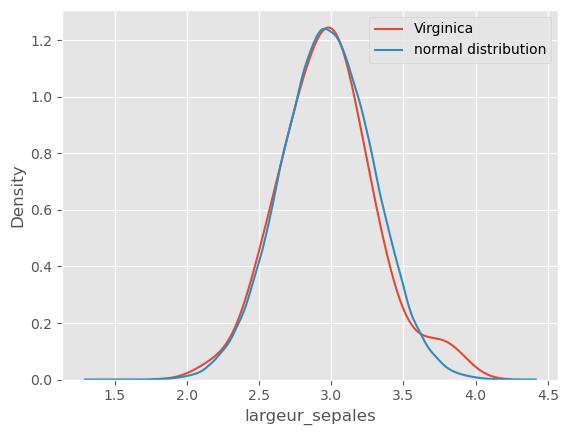

In [126]:
# la largeur des sepales d'Iris Virginica suit-elle une loi normal ?
  # nous allons verifier si la largeur d'Iris sepales Virginica que nous avons eu precedement suit une loi normal

mean = np.mean(iris_df[iris_df['especes']=='virginica']['largeur_sepales'])    # moyenne

std = np.std(iris_df[iris_df['especes']=='virginica']['largeur_sepales'])      # Ecart-type

samples_normal = np.random.normal(mean, std, size=100000)       # Distribution normal

sns.distplot(iris_df[iris_df['especes']=='virginica']['largeur_sepales'], hist=False, label='Virginica')

sns.distplot(samples_normal, hist=False, label='normal distribution')   # label c'est la legende

plt.legend()

plt.show()

# nous voulons comparé la distribution de la largeur des sepales d'Iris Virginica a une distribution normal(loi normal)
# afin de voir si c'est une loi normal. pour cela il faut tracer une distribution normal de meme moyenne et de 
# meme ecart-type et ensuite generé 100000 points dont la distribution suit une loi normal de moyenne mean et
# d'ecart-type std. ensuite avec la fonction distplot nous avons tracer la densité de probabilité. 

les deux courbes son pratiquement superposées et confondus. ce qui voudrait dire, la largeur des sepales d'Iris Virginica suit une loi normal. donc nous pouvons utilisé la lors normal pour estimé les probalités 

In [127]:
samples_normal  # j'ai afficher samples_normal pour abserver les valeurs de 100000 points dans le tuple

array([2.8359146 , 3.21965328, 3.22640024, ..., 3.29798119, 3.17515831,
       3.51072251])

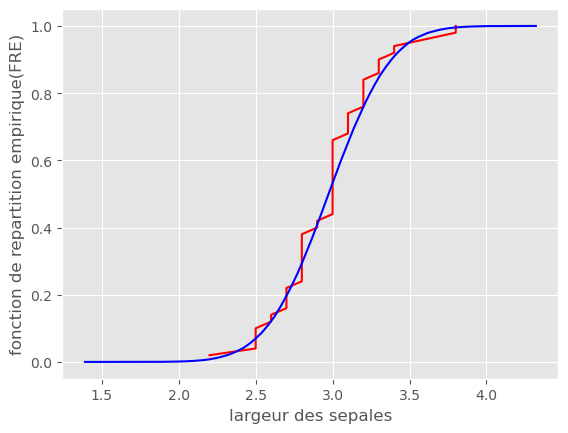

In [128]:
# la largeur des sepales d'Iris Virginica suit-elle une loi normal ?

x, y = fre(iris_df[iris_df['especes']=='virginica']['largeur_sepales'])

x_normal, y_normal = fre(samples_normal)

plt.plot(x, y, color= 'red')

plt.plot(x_normal, y_normal, color='blue')

plt.xlabel('largeur des sepales')

plt.ylabel('fonction de repartition empirique(FRE)')
plt.show()

# cette methode permet de verifier aussi si notre distribution sur la largeur des sepales d'Iris Virginica 
# suit exatement une loi normal. 

les deux courbes son pratiquement superposées et confondus. ce qui voudrait dire, la largeur des sepales d'Iris Virginica suit une loi normal. donc nous pouvons utilisé la lors normal pour estimé les probalités 

In [129]:
# probabilité que la largeur des sepales d'Iris Virginica soit > 3.5 cm
  # probabilité que la largeur des sepales d'Iris Virginica en prenant n'importe quel espece d'Iris Virginica
    # vue que la probalité suis une loi normal donc j'utilise """samples_normal"""

probabilite = np.sum(samples_normal > 3.5) / len(samples_normal)
print("la probabilite de la largeur des sepales d'Iris Virginica est estimé a ",round(probabilite*100,3), "%" )

la probabilite de la largeur des sepales d'Iris Virginica est estimé a  4.822 %


## UTILISATION DES SIMULATIONS POUR L'ESTIMATION DE PROBABILITE

La simulation est une technique qui permet de modéliser des systèmes plus ou moins complexes du monde réel. Elle est utilisée dans plusieurs domaines tels que la Physique, la biologie, la Finance, l'Intelligence Artificielle, etc. Les simulations nous donnent une solution approximative à un problème.

Pour effectuer des simulations, vous devez suivre les étapes ci-dessous :

- définir l'ensemble de tous les résultats possibles associés à une variable aléatoire;
- déterminer comment simuler un résultat aléatoire;
- déterminer la règle du succès;
- échantillonner à plusieurs reprises et compter les résultats;
- calculer la fréquence du succès comme une estimation de la probabilité.
 
Exemple 1 :

Soit une expérience consistant à lancer 5 fois une pièce de monnaie. II y a 50% de chance d'obtenir 'pile' et 50% de chances d'obtenir 'face' au cours d'un lancé. Un lancé de la pièce de monnaie est une épreuve de Bernoulli (Une épreuve de Bernoulli est une expérience aléatoire qui a deux issues possibles : succès et échec). Ici, nous définissons l'événement "obtenir une pile comme étant le succès et l'événement "obtenir une face" comme étant l'échec.
L'objectif est de répéter N fois l'expérience E et de calculer la probabilité d'obtenir 5 'pile' sur les 5 lancers.

Pour réaliser cette expérience, nous utiliserons le module random de Numpy. Nous allons générer des nombres réels pseudo-aléatoires compris entre O et 1. Si le nombre généré est inférieur à 0.5, on dira qu'on a 'pile'. Dans le cas contraire, on dira qu'on a 'face'.

In [130]:
# code pour s'assurer de la reproductibilité des resultats

np.random.seed(1111)

# np.random.seed(1111) permet de s'assurer de la reproductibilité des resultats. sans cette ligne de code on obtiendrait
# different nombre à chaque execution de code

In [131]:
# Realisation d'une experience E

outcomes = np.random.random(size=5)        # outcomes = resultat en anglais
print(outcomes)

# nombre de "pile" obtenu lors de cette experience 
  # notre regle (on va compté le nbre de fois on a obtenu un nombre inferieur a 0.5)
    
print(np.sum(outcomes < 0.5))  

[0.0955492  0.9250037  0.34357342 0.31047694 0.00200984]
4


Etant donner que nous savons comment simulé une Experience nous allons simulé maintenant N exeprience cette simulation est utiliser par les jeux d'hasard et les casinos pour estimé les probabilitées de gagné ou de perdre. l'idée c'est de repeter plusieurs fois une experience afin d'estimé la probabilité.
ici la probabilité est estimé par la Frequence de succes tous simplement.
On se dit qu'on s'approche de la verité de probailité réel lorsque le N est grand. plus le N est grand on s'approche de la verité

In [132]:
  # Simulation de N experience E
    
N = 1000000     # le nombre de repetition de l'experience   

# Initialisation du nombre total de foi ou on a obtenu 5 pile 
  # pendant une experience durant les N repetitions

n_all_pile = 0

for i in range(N):
    results = np.random.random(size=5)
    piles = results < 0.5
    n_piles = np.sum(piles)
    
    if n_piles == 5:
        n_all_pile = n_all_pile + 1
        
probabilite_all_pile = n_all_pile / N

print("la probabilité d'obtenir 5 pile sur les 5 lancés est de ",probabilite_all_pile*100, "%" )

la probabilité d'obtenir 5 pile sur les 5 lancés est de  3.1218 %


Exemple 2 :

Vous lancez deux dés numérotés chacun de 1 à 6. Tous les numéros ont la même probabilité d'apparition (distribution uniforme). Vous gagnez si les deux dés affichent le même numéro et vous perdez dans le cas Contraire.

Après avoir réalisé le jeu une fois, nous allons le répéter plusieurs fois afin d'estimer la probabilité de gagner à ce jeu.

In [133]:
# jouons une foi au jeu de dé
# regle de succes : jouer le meme numero sur les deux dé exemple le 4 sur 1er dé et le decond dé
  # dé = [1, 2, 3, 4, 5, 6]; probs ou probabilité = [1/6,1/6,1/6,1/6,1/6,1/6]; n_de ou nombre de dé = 2 d'ou de, probs, n_de
    
de, probs, n_de = [1, 2, 3, 4, 5, 6], [1/6,1/6,1/6,1/6,1/6,1/6], 2   

outcomes = np.random.choice(de, size = n_de, p = probs)           # outcomes = resultat en anglais
outcomes

array([2, 3])

In [134]:
# condition pour gagner ou perdre

if outcomes[0] == outcomes[1]:
    issue = 'gagné'
else:
    issue = 'perdu'
print("les deux dés affichent", outcomes[0], "et", outcomes[1], "donc on à", issue)

les deux dés affichent 2 et 3 donc on à perdu


In [135]:
# jouons plusieurs foi le jeu de dé

N = 1000000     # le nombre de repetition de l'experience

n_wins = 0    # Initialisation du nombre de foi ou on a gagné

for i in range(N):
    outcomes = np.random.choice(de, size = n_de, p = probs)
    if outcomes[0] == outcomes[1]:
        n_wins = n_wins + 1
        
probs_wins = n_wins / N

print("la probabilité de gagner à ce jeu est de ", probs_wins*100, "%")

la probabilité de gagner à ce jeu est de  16.6778 %


EXCELLENT ! La simulation est un outil puissant pour estimer des statistiques.

Cette section vous a permise de développer votre capacité à penser de manière probabiliste. Par ailleurs, vous avez aussi appris différents outils de Python qui vous aideront dans la résolution de problèmes d'inférence statistique.